# Instacart Analysis

## 1. Introduction

Instacart functions as a grocery delivery service, similar to Door Dash and Uber Eats, enabling customers to order groceries for delivery to their doorstep. Its operation is comparable to platforms like Uber Eats and DoorDash. The Instacart operates as a grocery delivery platform, much like DoorDash and Uber Eats, allowing users to order groceries for delivery right to their door. Its functionality mirrors that of Uber Eats and DoorDash. The data used in this analysis were made public by Instacart in 2017 for a Kaggle competition.

## 2. Overview of Data

Here are the descriptions of the five datasets used in the analysis:

1. `instacart_orders.csv`: This dataset contains information about orders placed on the Instacart app.
    - `order_id`: Unique identifier for each order.
    - `user_id`: Unique identifier for each customer account.
    - `order_number`: Number indicating how many times the customer has placed an order.
    - `order_dow`: Day of the week when the order was placed (0 represents an uncertain day).
    - `order_hour_of_day`: Hour of the day when the order was placed.
    - `days_since_prior_order`: Number of days since the customer's previous order.
2. `products.csv`: This dataset lists unique products available for purchase.
    - `product_id`: Unique identifier for each product.
    - `product_name`: Name of the product.
    - `aisle_id`: Unique identifier for each grocery aisle category.
    - `department_id`: Unique identifier for each grocery department category.
3. `order_products.csv`: Contains information about items placed in orders.
    - `order_id`: Unique identifier for each order.
    - `product_id`: Unique identifier for each product.
    - `add_to_cart_order`: Sequential order in which items were placed in the cart.
    - `reordered`: Binary indicator (0 or 1) showing whether the customer has ordered this product before.
4. `aisles.csv`: Provides details about grocery aisle categories.
    - `aisle_id`: Unique identifier for each grocery aisle category.
    - `aisle`: Name of the aisle category.
5. `departments.csv`: Contains information about grocery department categories.
    - `department_id`: Unique identifier for each grocery department category.
    - `department`: Name of the department category.

These datasets collectively offer comprehensive insights into customer behavior, product categories, and order details within the Instacart platform, facilitating detailed analysis and strategic decision-making processes.

In [9]:
# Import python libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [10]:
# Import datasets

try:
    orders_df = pd.read_csv('../data/instacart_orders.csv', sep=";")
    products_df = pd.read_csv('../data/products.csv', sep=";")
    aisles_df = pd.read_csv('../data/aisles.csv', sep=";")
    departments_df = pd.read_csv('../data/departments.csv', sep=";")
    order_products_df = pd.read_csv('../data/order_products.csv', sep=';')
    
except FileNotFoundError as Error:
    print(f"Error reading file: {Error}. Try again!")

In [3]:
orders_df.info() # Get general info about data
orders_df.head(10) # Confirm that data looks good from import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [4]:
products_df.info() # Get general info about data
products_df.head(10) # Confirm that data looks good from import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
aisles_df.info() # Get general info about data
aisles_df.head(10) # Confirm that data looks good from import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [6]:
departments_df.info() # Get general info about data
departments_df.head(10) # Confirm that data looks good from import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
order_products_df.info(show_counts=True) # Get general info about data
order_products_df.head(10) # Confirm that data looks good from import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


## 3. Data Cleaning

### 3.1. The `orders` DataFrame

In [8]:
# Check for duplicated orders

total_duplicated_orders = orders_df.duplicated().sum() # Count number of duplicate values in the DataFrane
print(f'Total number of duplicates: {total_duplicated_orders}')
print()
print(orders_df['order_id'].value_counts()) # Check for duplicates in the order_id column
print()
print(orders_df['order_id'].duplicated().sum()) # Check for number of duplicates in the order_id column

Total number of duplicates: 15

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64

15


In [9]:
# Check for all orders placed Wednesday at 2:00 AM

wednesday_orders = orders_df[(orders_df['order_dow'] == 2) & (orders_df['order_hour_of_day'] == 2)] # Check for orders placed on day 2 (Wed) and at hour 2 (2:00 AM)
print(wednesday_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [10]:
# Remove duplicate orders

orders_df = orders_df.drop_duplicates().reset_index(drop=True) # Remove duplicates & reassign back to orders_df

In [11]:
# Double check for duplicate rows

print(orders_df.duplicated().sum()) # Print number of duplicate values in the DataFrane after dropping them

0


In [12]:
# Double check for duplicate order IDs only

print(orders_df['order_id'].duplicated().sum()) # Print number of duplicate values in the order_id col of the DataFrame

0


### 3.2. The `products` DataFrame

In [13]:
# Check for fully duplicate rows

print(products_df.duplicated()) # Check for fully duplicated rows in the DataFrame

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


In [14]:
# Check for just duplicate product IDs

print(products_df['product_id'].nunique()) # Check for number of unique values in 'product_id' col; should equal 49694 if there are no duplicates
print(products_df['product_id'].duplicated().sum()) # Check number of duplicated values in 'product_id' col

49694
0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)

products_df['product_name_lower'] = products_df['product_name'].str.lower() # Create a new col and convert product names to lowercase
products_df = products_df.drop_duplicates(subset='product_name_lower').reset_index(drop=True) # Drop the duplicates 

products_df.loc[0:, 'product_name'] = products_df.loc[0:, 'product_name_lower'] # Replacing the values in 'product_name' with the values from 'product_name_lower'
products_df.drop(columns=['product_name_lower'], inplace=True) # Delete the 'product_name_lower' column since no longer needed

In [16]:
# Check for duplicate product names that aren't missing

print(products_df.query('product_name.notna() and product_name.duplicated()')) # Check for duplicate product names that are not missing

# The duplicates were handled in the cell above

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### 3.3. The `departments` DataFrame

In [17]:
print(departments_df['department_id'].duplicated().sum()) # Check number of duplicates in 'department_id' column

0


In [18]:
print(departments_df['department'].str.lower().duplicated().sum()) # Check number of duplicates in 'department' column after converting them to lowercase

0


### 3.4 The `aisles` DataFrame

In [19]:
print(aisles_df['aisle_id'].duplicated().sum()) # Check number of duplicates in 'aisle_id' column

0


In [20]:
print(aisles_df['aisle'].str.lower().duplicated().sum()) # Check number of duplicates in 'aisle' column after converting them to lowercase

0


### 3.5. The `order_products` DataFrame

In [21]:
# Check for fullly duplicate rows

print(order_products_df.duplicated()) # Check for fully duplicated rows in the DataFrame
print()
print(f'Number of duplicates: {order_products_df.duplicated().sum()}')

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool

Number of duplicates: 0


In [22]:
# Double check for any other tricky duplicates

print(f'Number of "product_id" duplicates {order_products_df["product_id"].duplicated().sum()}')
print(f'Number of "order_id" duplicates {order_products_df["order_id"].duplicated().sum()}')
print()
print('"product_id" value counts')
print(order_products_df['product_id'].value_counts())
print()
print('"order_id" value counts')
print(order_products_df['order_id'].value_counts())

Number of "product_id" duplicates 4499434
Number of "order_id" duplicates 4094961

"product_id" value counts
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
10543        1
5222         1
2347         1
11893        1
32074        1
Name: product_id, Length: 45573, dtype: int64

"order_id" value counts
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


#### Explanation

Upon exploration, it has been observed that there are duplicates present in the `order_id` and `product_id`columns, but this is a common occurrence in this dataset.

For instance, it is possible for two distinct orders to include the same product, resulting in duplication in the `product_id` column. Likewise, duplication in the 'order_id' column can occur when a user places multiple products in a single order, reflecting each instance of adding an item to the cart.

In [23]:
print(products_df.isna().sum()) # Print number of missing values

product_id       0
product_name     1
aisle_id         0
department_id    0
dtype: int64


In [24]:
print(products_df[products_df['aisle_id'] == 100]) # print the row where 'aisle_id' is 100

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


The singular missing value in the products dataset is indeed related to aisle ID 100.

In [25]:
print(products_df[products_df['department_id'] == 21]) # print the row where 'department_id' is 21

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


The absence of a value in the products dataset does indeed correspond to department ID 21.

In [26]:
print(departments_df[departments_df['department_id'] == 21]) # Find the department name
print()
print(aisles_df[aisles_df['aisle_id'] == 100]) # Find the aisle name

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Determining the specific characteristics or values of missing data is impossible since they are not present in the dataset.

In [27]:
# Fill missing product names with 'Unknown'

products_df.loc[37, 'product_name'] = 'Unkown' # Changing the NaN value for row 37 to 'Unknown'
print(products_df.isna().sum()) # Check missing values again!

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [28]:
print(orders_df.isna().sum()) # Print number of missing values

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


There are no missing values where it's not a customer's first order.

In [30]:
print(order_products_df.isna().sum())  # Print number of missing values

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [13]:
add_to_cart_order_max_value = order_products_df['add_to_cart_order'].max()
add_to_cart_order_min_value = order_products_df['add_to_cart_order'].min()

print(f'The max value is {add_to_cart_order_max_value}.\nThe min value is {add_to_cart_order_min_value}.')

The max value is 64.0.
The min value is 1.0.


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

list_of_order_ids = order_products_df.query('not add_to_cart_order > 0')['order_id'].tolist()
list_of_order_ids

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1717990,
 1564093,
 129627,
 264710,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2449164,
 2094761,
 3347453,
 1038146,
 2136777,
 2997021,
 844733,
 844733,
 2136777,
 813364,
 165801,
 2256933,
 171934,
 264710,
 2449164,
 2409109,
 3347453,
 813364,
 2926893,
 936852,
 1730767,
 1169835,
 733526,
 844733,
 293169,
 61355,
 903110,
 1968313,
 733526,
 2136777,
 2926893,
 404157,
 1386261,
 171934,
 3125735,
 747668,
 3308010,
 1169835,
 1800005,
 1961723,
 936852,
 2849370,
 3308010,
 61355,
 871281,
 1717990,
 813364,
 388234,
 61355,
 3125735,
 1959075,
 61355,
 3125735,
 1648217,
 171934,
 3125735,
 61355,
 1477139,
 1959075,
 1717990,
 1717990,
 61355,
 1717990,
 171934,
 1038146,
 3308010,
 3347453,
 102236,
 936852,
 171934,
 1730767,
 2926893,
 1021563,
 1832957,
 1959075,
 2256933,
 1968313,
 2721963,
 293169,
 102236,
 3125735,
 1959075,
 264710,


In [33]:
order_products_missing_values_df = order_products_df.query('order_id in @list_of_order_ids and add_to_cart_order > 64.0')
print(order_products_missing_values_df)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


It is not the case that all orders with missing values have more than 64 products. If that were true, the custom filter mentioned above would have returned some results. However, it currently returns an empty DataFrame without any values.

In [34]:
# Replace missing values with 999 and convert column to integer type

order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999) # Fill missing values with 999
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int') # Convert col to integer type

print(order_products_df['add_to_cart_order'].dtype) # Check column data type

print(order_products_df['add_to_cart_order'].isna().sum()) # Checkk for missing values again

int64
0


## 4. Data Exploration

### 4.1. Confirm the Sensibility of `order_hour_of_day` and `order_dow` Values within the `orders` Table

In [35]:
orders_df['order_hour_of_day'].describe() # Finding the max and min for the 'order_hour_of_day' column

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [36]:
orders_df['order_dow'].describe() # Finding the max and min for the 'order_dow' column

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Both `order_dow` (day of the week for the order) and `order_hour_of_day` (hour of the day for the order) are meaningful and reasonable metrics for analyzing shopping behavior.

### 4.2. Determining the preferred shopping time

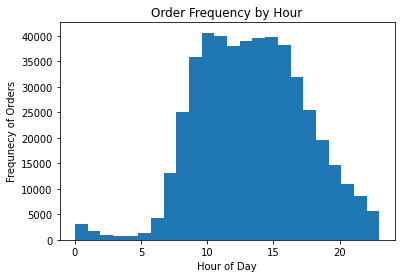

In [37]:
orders_df['order_hour_of_day'].plot(kind='hist', title='Order Frequency by Hour', bins=24)
plt.xlabel('Hour of Day') # The xlabel and ylabel parameters were not working when used inside the plot() method in Pandas, so I used the Matplotlib Method instead.
plt.ylabel('Frequnecy of Orders')
plt.show()

Typically, individuals tend to shop from approximately 7:00 AM to 9:00 PM. The peak hours for orders are usually around 12:00 PM and 3:00 PM.

### 4.3. Analyzing shopping patterns reveals the days of the week when people tend to shop.

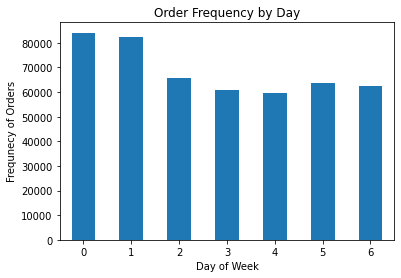

In [38]:
order_freq_by_day = orders_df['order_dow'].value_counts().sort_index() # Calculate order_freq_by_day 

order_freq_by_day.plot(kind='bar', title='Order Frequency by Day', xlabel='Day of Week', ylabel='Frequnecy of Orders', rot=0)
plt.show()

People typically spread out their shopping activities fairly evenly across the week. However, Monday and Tuesday emerge as the two busiest days for orders.

### 4.4. Determing the average duration between orders

In [39]:
print(orders_df['days_since_prior_order'].describe()) # Find the mean, max and min

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


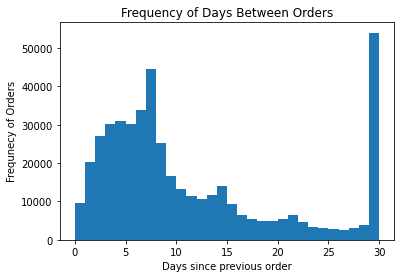

In [40]:
orders_df['days_since_prior_order'].plot(kind='hist', title='Frequency of Days Between Orders', bins=30)
plt.xlabel('Days since previous order')
plt.ylabel('Frequnecy of Orders')
plt.show()

The majority of individuals usually wait only a few days between orders, with the waiting period ranging from 0 to 11 days. The number of individuals re-ordering between 15 to 29 days decreases. However, there is a notable increase in people who wait approximately 30 days before reordering.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

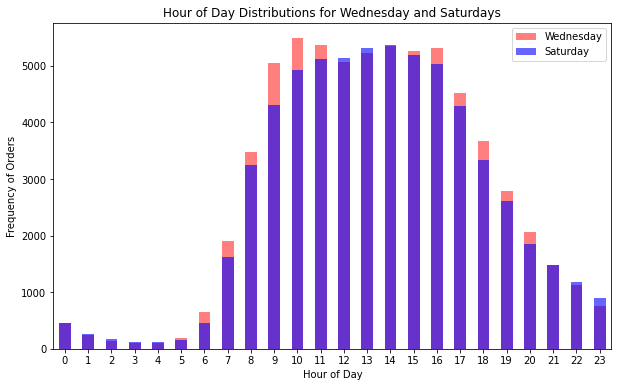

In [41]:
wednesday_order_freq = orders_df[orders_df['order_dow'] == 2]['order_hour_of_day'].value_counts().sort_index()
saturday_order_freq = orders_df[orders_df['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

wednesday_order_freq.plot(kind='bar', figsize=(10,6), color='red', alpha=0.5, title='Hour of Day Distributions for Wednesday and Saturdays', xlabel='Hour of Day', ylabel='Frequency of Orders', rot=0, label='Wednesday')
saturday_order_freq.plot(kind='bar', figsize=(10,6), color='blue', alpha=0.6, title='Hour of Day Distributions for Wednesday and Saturdays', xlabel='Hour of Day', ylabel='Frequency of Orders', rot=0, label='Saturday')
plt.legend()
plt.show()

#### Explanation

The distribution of order hours on Wednesdays compared to Saturdays shows minor variations. While the overall shapes of the distributions are similar, there are noticeable differences in peak hours and frequencies. Wednesdays exhibit higher peak hours in specific periods, whereas Saturdays have higher frequencies in later hours of the day. Despite these differences, the overall patterns between the two days remain quite similar in terms of the order hour distribution.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Everything is correct here; however once again bar plot could be more usefull here.</div>


### [B2] What's the distribution for the number of orders per customer?

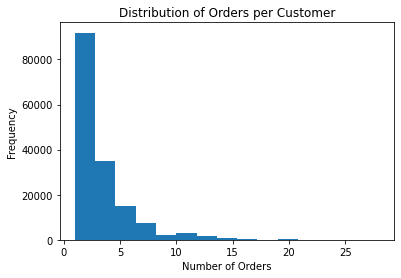

In [42]:
orders_per_customer = orders_df['user_id'].value_counts() # Creating a series of Customer Ids and Order Freq
orders_per_customer.plot(kind='hist', title='Distribution of Orders per Customer', bins=15)
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

In [43]:
orders_per_customer.describe()

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: user_id, dtype: float64

The majority of customers in the dataset have ordered between 1 and 8 times, constituting a significant portion of the distribution. This observation is reinforced by the descriptive statistics provided above. Specifically, we note that the 25th, 50th, and 75th percentiles of the distribution fall within the range of 1 to 8 orders per customer.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
You got correct results. 

### [B3] What are the top 20 popular products (display their id and name)?

In [44]:
top_products_id = order_products_df['product_id'].value_counts(sort=True).head(20).index.tolist() # save top 20 prodcuts to a list
print(top_products_id)

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706]


In [45]:
top_20_popular = products_df.query('product_id in @top_products_id')[['product_name', 'product_id']].reset_index(drop=True) # query based on top_products list
print(top_20_popular)

                product_name  product_id
0              organic lemon        5876
1   apple honeycrisp organic        8277
2     bag of organic bananas       13176
3               strawberries       16797
4       organic strawberries       21137
5       organic baby spinach       21903
6       organic yellow onion       22935
7                     banana       24852
8             organic garlic       24964
9                      limes       26209
10        organic whole milk       27845
11       organic raspberries       27966
12        organic fuji apple       28204
13       organic blueberries       39275
14    organic grape tomatoes       40706
15          organic zucchini       45007
16      organic hass avocado       47209
17               large lemon       47626
18           organic avocado       47766
19            cucumber kirby       49683


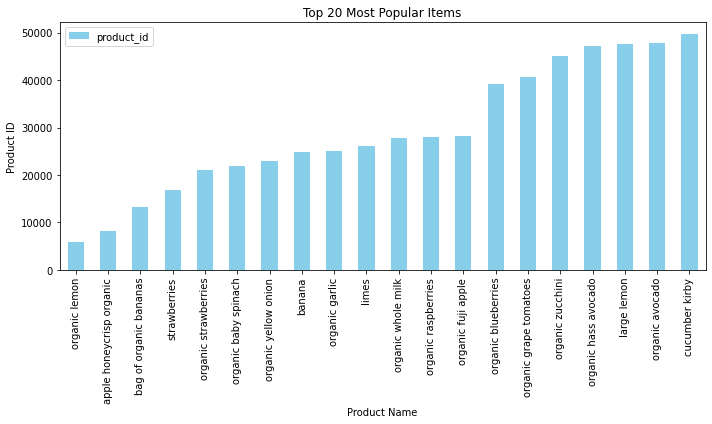

In [46]:
top_20_popular.plot(kind='bar', x='product_name', y='product_id', figsize=(10,6), title='Top 20 Most Popular Items', xlabel='Product Name', ylabel='Product ID', color='skyblue')
plt.tight_layout()
plt.show()   

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Additionally, you could plot the results on this query in the following way: 

```
plt.figure(figsize=(10,6))
plt.barh(top_20_popular['product_name'], top_20_popular['product_id'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Product Name')
plt.title('Barplot of Product IDs against Product Names')
plt.gca().invert_yaxis()  # To have the first product on top
plt.tight_layout()
plt.show()   
```
</div>


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
items_per_order = order_products_df.groupby('order_id')['product_id'].count() # Count items in every order

mean_items_per_order = items_per_order.mean() # get the mean (average)
median_items_per_order = items_per_order.median() # get the median 

print(f"The average is: {mean_items_per_order.round(2)}\nThe median is: {median_items_per_order}")

The average is: 10.1
The median is: 8.0


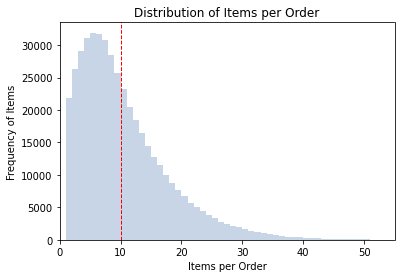

In [48]:
items_per_order.plot(kind='hist', title='Distribution of Items per Order', bins=range(1, 52), xlim=[0, 55], alpha=0.7, color='lightsteelblue')
plt.axvline(items_per_order.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Items per Order")
plt.ylabel("Frequency of Items")
plt.show()

Customers generally purchase varying quantities of items per order, ranging from 0 to 50 items. Nevertheless, the majority of customers tend to make relatively small purchases on InstaCart, typically between 1 and 11 items per order. On average, customers buy around 8 items per order. The distribution pattern indicates that as the number of items in an order increases, the frequency of such purchases decreases.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Using `axvline` can be very helpful in this context. It allows you to draw a vertical line on the plot at a specified x-value. For instance:

You can use it to mark the mean of the data, giving a visual representation of where the average lies.
    
Adding these lines can provide additional insight into the distribution of the data, making it easier to understand the typical behavior (like where the central tendency of the data is) and variability (how spread out the data points are).

If you choose to use axvline, here's a quick example for the `mean`:
```
plt.hist(items_per_order, bins=range(1, 52), alpha=0.7)
plt.axvline(items_per_order.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
plt.title('Distribution of items per order')
plt.show()
```

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [49]:
reordered_items = order_products_df[order_products_df['reordered'] == 1]
reorder_counts = reordered_items['product_id'].value_counts().head(20)
print(reorder_counts)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [50]:
top_20_reordered = products_df.query('product_id in @reorder_counts.index')[['product_id', 'product_name']].reset_index(drop=True)
print(top_20_reordered)

    product_id              product_name
0         5876             organic lemon
1         8277  apple honeycrisp organic
2        13176    bag of organic bananas
3        16797              strawberries
4        21137      organic strawberries
5        21903      organic baby spinach
6        22935      organic yellow onion
7        24852                    banana
8        24964            organic garlic
9        26209                     limes
10       27845        organic whole milk
11       27966       organic raspberries
12       28204        organic fuji apple
13       39275       organic blueberries
14       45007          organic zucchini
15       47209      organic hass avocado
16       47626               large lemon
17       47766           organic avocado
18       49235       organic half & half
19       49683            cucumber kirby


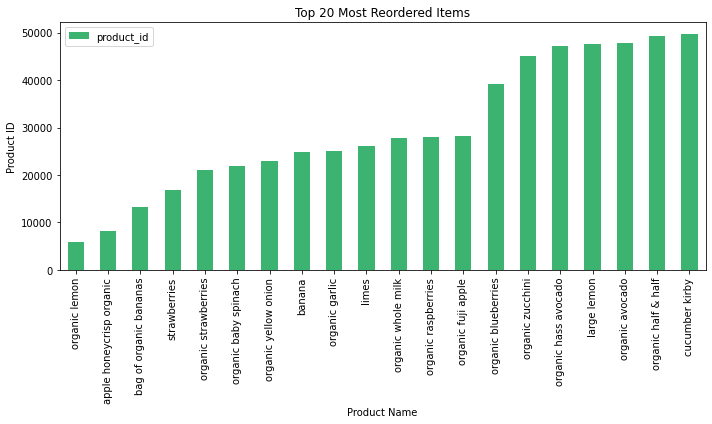

In [51]:
top_20_reordered.plot(kind='bar', x='product_name', y='product_id', figsize=(10,6), title='Top 20 Most Reordered Items', xlabel='Product Name', ylabel='Product ID', color='mediumseagreen')
plt.tight_layout()
plt.show()   

The list above shows the top 20 most frequently purchased items in the dataset (in no paritcular order). However, based on the reorder_counts, it is easy to see that Bananas are the most frequently re-ordered items.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
You got correct results. You could create a graph with this information. I left an example of how to do that above.
    
PS: in many cases it is helpful to support your results with a plot (barchart in that case). 

### [C3] For each product, what proportion of its orders are reorders?

In [52]:
proportion_produdct_reorders = order_products_df.groupby('product_id')['reordered'].mean().round(3).reset_index() # Calculate proportions of reordered
print(proportion_produdct_reorders)

       product_id  reordered
0               1      0.564
1               2      0.000
2               3      0.738
3               4      0.510
4               7      0.500
...           ...        ...
45568       49690      0.800
45569       49691      0.431
45570       49692      0.417
45571       49693      0.440
45572       49694      0.333

[45573 rows x 2 columns]


In [53]:
merged_proportions_df = products_df.merge(proportion_produdct_reorders, on='product_id', how='left').drop(['aisle_id', 'department_id'], axis='columns') # Merge the two DFs
print(merged_proportions_df)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               5                          green chile anytime sauce   
...           ...                                                ...   
48328       49684          vodka- triple distilled- twist of vanilla   
48329       49685                 en croute roast hazelnut cranberry   
48330       49686                                   artisan baguette   
48331       49687         smartblend healthy metabolism dry cat food   
48332       49688                             fresh foaming cleanser   

       reordered  
0          0.564  
1          0.000  
2          0.738  
3          0.510  
4            NaN  
...          ...  
48

In [54]:
merged_proportions_df.isna().sum() # Calculate number is missing values. If a proportion is missing, it means the product was not reordered.
merged_proportions_df.fillna(0.000) # Fill missing values with 0 (same level of accuracy as existing values)

,product_id,product_name,reordered
0,1,chocolate sandwich cookies,0.564
1,2,all-seasons salt,0.000
2,3,robust golden unsweetened oolong tea,0.738
3,4,smart ones classic favorites mini rigatoni wit...,0.510
4,5,green chile anytime sauce,0.000
...,...,...,...
48328,49684,vodka- triple distilled- twist of vanilla,0.000
48329,49685,en croute roast hazelnut cranberry,0.500
48330,49686,artisan baguette,0.625
48331,49687,smartblend healthy metabolism dry cat food,0.000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Everything is correct here. 

### [C4] For each customer, what proportion of their products ordered are reorders?

In [55]:
proportion_reorders = order_products_df.groupby('order_id')['reordered'].mean().round(3).reset_index() # Calculate proportions of reordered
print(proportion_reorders)

        order_id  reordered
0              4      0.923
1              9      0.667
2             11      1.000
3             19      1.000
4             20      0.000
...          ...        ...
450041   3421034      1.000
450042   3421053      1.000
450043   3421071      0.200
450044   3421077      0.000
450045   3421079      0.000

[450046 rows x 2 columns]


In [56]:
orders_merged = orders_df.merge(proportion_reorders, on='order_id', how='left').drop(['order_dow', 'order_hour_of_day', 'days_since_prior_order'], axis='columns')
proportion_of_reorders_by_user = orders_merged.groupby('user_id')['reordered'].mean()

print(proportion_of_reorders_by_user)

user_id
2         0.038500
4         0.000000
5         0.667000
6         0.000000
7         0.944500
            ...   
206203    0.222000
206206    0.690429
206207    0.815000
206208    0.731444
206209    0.347000
Name: reordered, Length: 157437, dtype: float64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Fully agree with your results. 

### [C5] What are the top 20 items that people put in their carts first? 

# Conclusions

In [57]:
print(orders_df['user_id'].nunique())

157437


The data presented some clear insights into shopping behaviors of 157437 unqique individuals. The data shows that individuals tend to shop from approximately 7:00 AM to 9:00 PM, which makes sense since these are probably the times whe a vast majority of shoppers, and drivers are available. Additionally, the beginning of the week, both Monday and Tuesday, have higher order numbers, when compared to the rest of the week. However, the order frequency from Wednesday to Sunday are very similar, and do not deviate by much. Shoppers tend to buy 8-10 items per purchase when placing orders, so it is evident that customers do not typical use the application for all of their grocery shopping, but perhaps small quantities of items that they are in need of. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Could you please add short overall conclusions?

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Fully agree with your conclusions and thank you for adding them. 